
## Task 1 - Prediction using Supervised ML
### Predict the percentage of a student based on the number of study hours
### Author: R V Sahiti Gupta

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
score = pd.read_csv("student_scores.csv")
score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Exploration

In [3]:
#Concise summary of the dataset
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Descriptive statistics of the dataset
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Checking for null values
score.isnull().any()

Hours     False
Scores    False
dtype: bool

There are no null values present in the dataset and hence data cleaning is not required.

### Data Visualization

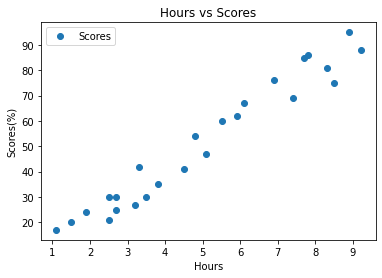

In [6]:
#Relationshipp between hours studied and score obtained
score.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.show()

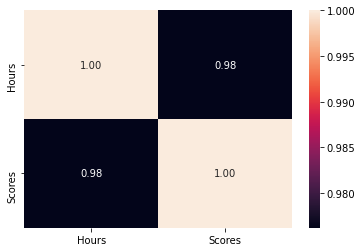

In [7]:
#Correlation of the dataset
sns.heatmap(score.corr(),annot=True,fmt='.2f')

From the above heatmap, it is observed that there is a positive correlation of 0.98 between hours studied and the scores.

### Data Training

In [8]:
#Selecting the attributes and labels
X = score.iloc[:, :-1].values  
y = score.iloc[:, 1].values 

In [9]:
#Splitting the data into training set and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Data Modelling

In [10]:
#Predicting the score of a student using Linear Regression
from sklearn.linear_model import LinearRegression  
lnr_reg = LinearRegression()  
lnr_reg.fit(X_train, y_train) 

y_pred=lnr_reg.predict(X_test)

In [11]:
print('Coefficient:',lnr_reg.coef_)
print('Intercept:',lnr_reg.intercept_)

Coefficient: [9.91065648]
Intercept: 2.018160041434683


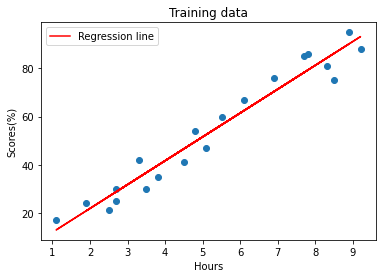

In [12]:
# Plotting the regression graph for training data
line = lnr_reg.coef_*X_train+lnr_reg.intercept_

plt.scatter(X_train, y_train)
plt.plot(X_train, line,color='red',label='Regression line');
plt.title('Training data')
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.legend()
plt.show()

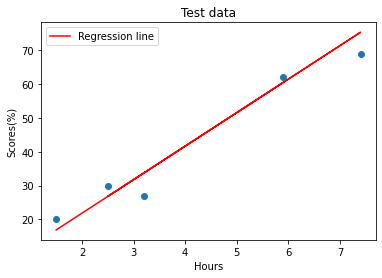

In [13]:
# Plotting the regression graph for test data
line = lnr_reg.coef_*X_test+lnr_reg.intercept_

plt.scatter(X_test, y_test)
plt.plot(X_test, line,color='red',label='Regression line');
plt.title('Test data')
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.legend()
plt.show()

In [14]:
#Comparing the actual and the predicted scores
df = pd.DataFrame({'Actual score': y_test, 'Predicted score': y_pred})  
df 

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
#Testing the model
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lnr_reg.predict(test)
print("No of Hours: {}".format(hours))
print("Predicted Score: {} %".format(own_pred[0]))

No of Hours: 9.25
Predicted Score: 93.69173248737538 %


In [16]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
